In [638]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1><center>Online Shoppers Segmentation</center></h1>

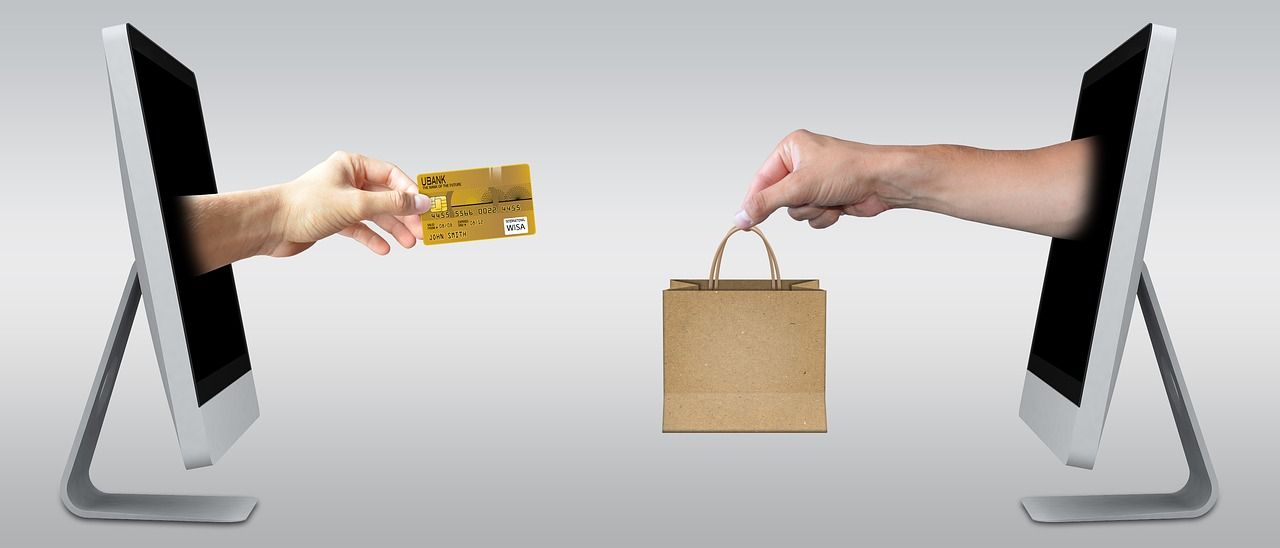

In [546]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:/Users/rabia/Desktop/Thinkful/"
Image(filename = PATH + "online_shopping_1526091900.jpg", width=2000, height=2000)

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [601]:
shoppers = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/online_shoppers_intention.csv')

# Introduction

- **Data Source** 
    - C. Okan Sakar Department of Computer Engineering, Faculty of Engineering and Natural Sciences, Bahcesehir University, 34349 Besiktas, Istanbul, Turkey
    - Yomi Kastro Inveon Information Technologies Consultancy and Trade, 34335 Istanbul, Turkey

- The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

- The year, information about the studied website, and other minor information are not provided.

# Dataset
- The dataset consists of 18 columns and 12,316 sessions
- The features can be grouped into 4 groups:
    - **Sessions Time**: ("Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration")
    - **e-commerce Metrics**: ("Bounce Rate", "Exit Rate", "Page Value", and "Traffic Type) 
    - **Visitor Related Information**: ("Operating Systems", "Browser", "Region", and "Visitor Type")
    - **Session Time or Period**: ("Month", "Special Day", and "weekend")
    
Below is a preview of the Dataset table

In [9]:
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [602]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [102]:
shoppers.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

# Summary Statistics of the Dataframe Columns

In [10]:
shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [603]:
shoppers = shoppers.dropna()

In [599]:
len(shoppers)

12316

In [604]:
shoppers.Revenue = shoppers.Revenue.map(lambda x: 'False' if x == False else 'True')
shoppers.Weekend = shoppers.Weekend.map(lambda x: 'False' if x == False else 'True')

# Data Exploration
- **Revenue** : Less than 20% of the session resulted in sales(Revenues)
- **Weekend** : Approxamitly 30% of session happened during Weekends

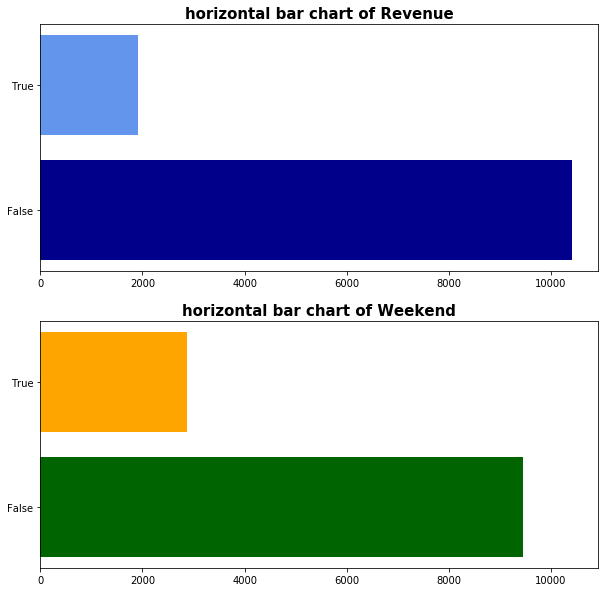

In [551]:
plt.figure(figsize=(10,10))

ax = plt.subplot(2, 1, 1)
plt.barh(shoppers.groupby("Revenue")["Revenue"].count().index, 
        shoppers.groupby("Revenue")["Revenue"].count(), 
        color=["darkblue", "cornflowerblue"])
plt.title("horizontal bar chart of Revenue", fontweight="bold", fontsize = 15)

plt.subplot(2, 1, 2, sharex=ax)
plt.barh(shoppers.groupby("Weekend")["Weekend"].count().index, 
        shoppers.groupby("Weekend")["Weekend"].count(), 
        color=["darkgreen", "orange"])

plt.title("horizontal bar chart of Weekend", fontweight="bold", fontsize = 15)
plt.show()

## Data Exploration (cont.)
- **Revenues on Weekends vs weekdays** : Perentage of sessions result in sales(Revenues) to the total sessions is almost the same during weekends and weekdays.

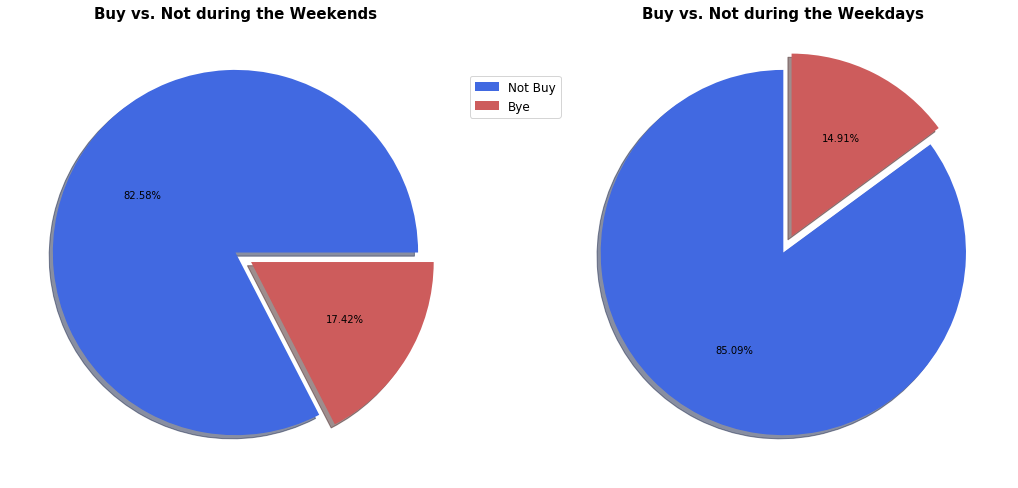

In [552]:
plt.figure(figsize=(18,10))

size = weekend['Revenue'].value_counts().tolist()
colors = ['royalblue', 'indianred']
labels = weekend['Revenue'].unique().tolist()
explode = [0, 0.1]

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Buy vs. Not during the Weekends', fontweight="bold", fontsize = 15)
plt.axis('off')


size = weekdays['Revenue'].value_counts().tolist()
colors = ['royalblue', 'indianred']
labels = weekdays['Revenue'].unique().tolist()
explode = [0, 0.1]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Buy vs. Not during the Weekdays', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels = ['Not Buy', 'Bye'], bbox_to_anchor=(-0.2,0.9), prop={'size': 12}, loc="upper left")
plt.show()

## Data Exploration (cont.)
- **Visitor Type** : Most of the website visitors are Returning Visitors. Only less than 15% of the visitios are new.
- **Visitors per Month** : More than 75% of the sessions occured in 4 months (November, December, March, and May) which indicate that this website is selling seasonal products.
- **Note** : No sessions recoreded in the months of January and April.

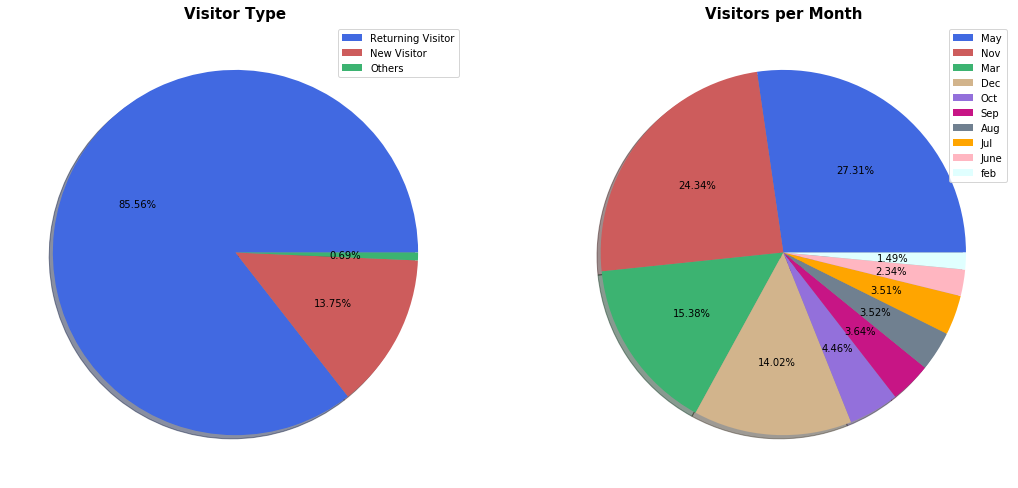

In [554]:
plt.figure(figsize=(18,10))

size = shoppers['VisitorType'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen']
labels = shoppers['VisitorType'].unique().tolist()

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Visitor Type', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels = ['Returning Visitor', 'New Visitor', 'Others'])

size = shoppers['Month'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple', 'mediumvioletred', 'slategrey', 'orange', 
          'lightpink', 'lightcyan']
labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'feb']

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Visitors per Month', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels = labels)
plt.show()

## Data Exploration (cont.)
- More than 50% of the users is using Operating System type(2) and Browser type(2)
- **Region** : More than thirs of the visitors are from Region(1) followed by Region(3) (approx. 20%)
- Traffic Type (2) represent 30% of the traffic to this website 

In [605]:
shoppers['OperatingSystems'] = np.where(shoppers.OperatingSystems > 3, 0, shoppers.OperatingSystems)
shoppers['Browser'] = np.where(shoppers.Browser > 2, 0, shoppers.Browser)
shoppers['TrafficType'] = np.where(shoppers.TrafficType > 4, 0, shoppers.TrafficType)

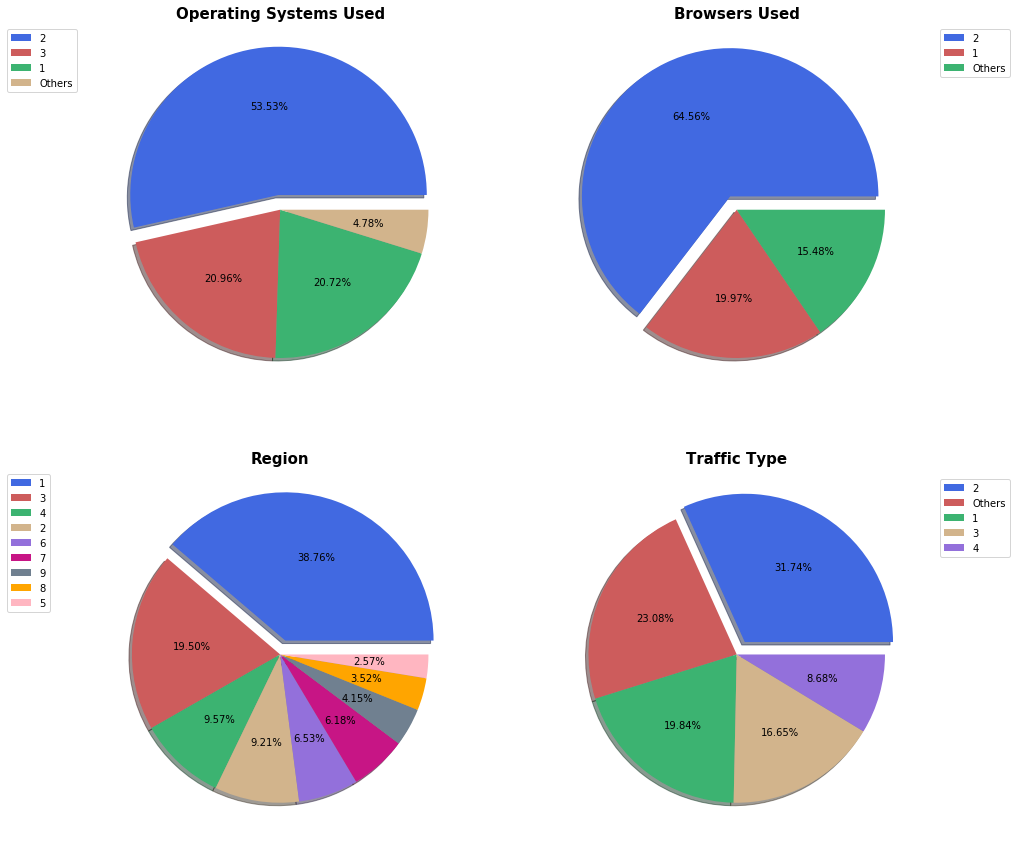

In [556]:
plt.figure(figsize=(15,15))

size = shoppers['OperatingSystems'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan']
labels = ['2', '3', '1', 'Others']
explode = [0.1, 0, 0, 0]

plt.subplot(2, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Operating Systems Used', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(-0.25,1), labels = labels, loc="upper left")

size = shoppers['Browser'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen']
labels = ['2', '1', 'Others']
explode = [0.1, 0, 0]

plt.subplot(2, 2, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Browsers Used', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.25,1), labels = labels, loc="upper right")

size = shoppers['Region'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple', 'mediumvioletred', 'slategrey', 'orange', 
          'lightpink']
labels = ['1', '3', '4', '2', '6', '7', '9', '8', '5']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]

plt.subplot(2, 2, 3)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Region', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(-0.25,1), labels = labels, loc="upper left")

size = shoppers['TrafficType'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple']
labels = ['2', 'Others', '1', '3', '4']
explode = [0.1, 0, 0, 0, 0]

plt.subplot(2, 2, 4)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Traffic Type', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.25,0.75), labels = labels, loc="lower right")
plt.show()

## Data Exploration (cont.)
- **Special Day** : approx. only 10% of the sessions happened during special days, while the majority of the session were during regular days.
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

In [606]:
no_special_day = shoppers.loc[shoppers['SpecialDay'] != 0]

In [607]:
shoppers['SpecialDay'] = np.where(shoppers.SpecialDay > 0, 1, shoppers.SpecialDay)

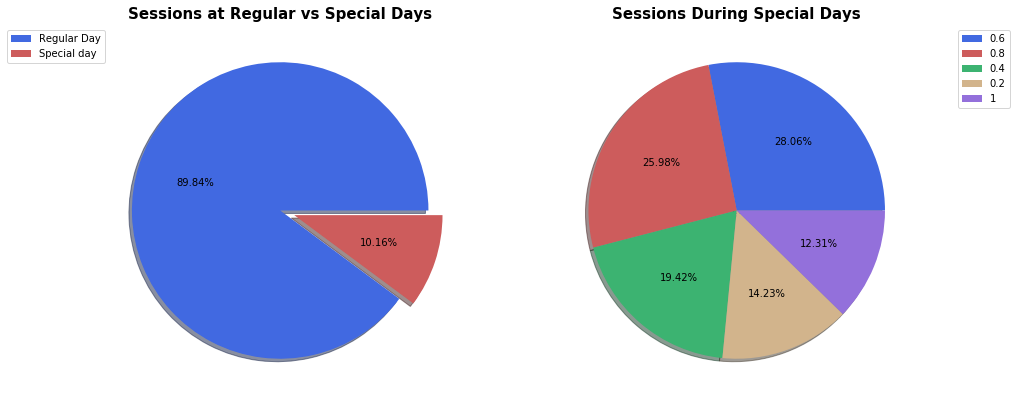

In [561]:
plt.figure(figsize=(15,15))

size = shoppers['SpecialDay'].value_counts().tolist()
colors = ['royalblue', 'indianred']
labels = ['Regular Day', 'Special day']
explode = [0, 0.1]

plt.subplot(2, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions at Regular vs Special Days', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(-0.25,1), labels = labels, loc="upper left")

size = no_special_day['SpecialDay'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple']
labels = ['0.6', '0.8', '0.4', '0.2', '1']


plt.subplot(2, 2, 2)
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Sessions During Special Days', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.25,1), labels = labels, loc="upper right")
plt.show()

## Data Exploration (cont.)
- No clear correlation between the 3 features. It is more clustered towered "zero".
- No clear relationship between these 3 features and Revenue feature. 

<Figure size 1296x2160 with 0 Axes>

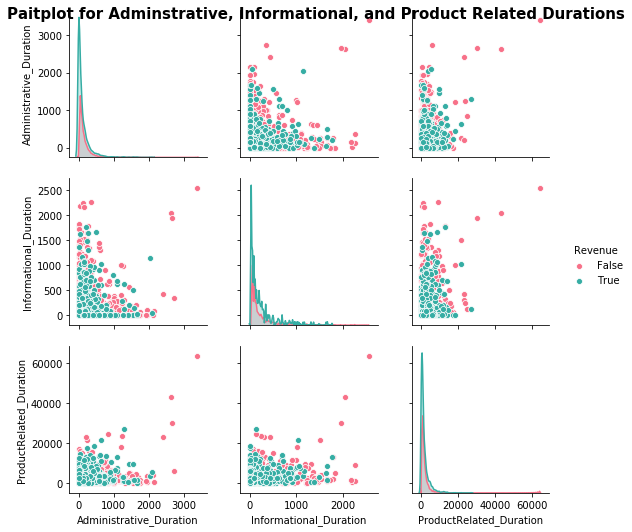

In [572]:
plt.figure(figsize=(18,30))
sns.pairplot(shoppers[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Revenue']], 
             palette="husl", hue = 'Revenue')
plt.suptitle('Paitplot for Adminstrative, Informational, and Product Related Durations', fontweight="bold", fontsize = 15)
plt.show()

## Data Exploration (cont.)
- Positive linear correlation between bounce and exit rates.
- More sessions with no sale (revenues) when Bounce and Exit rates are high, When these values close to "zero" the opportunity to generate revenues is higher.

<Figure size 1296x720 with 0 Axes>

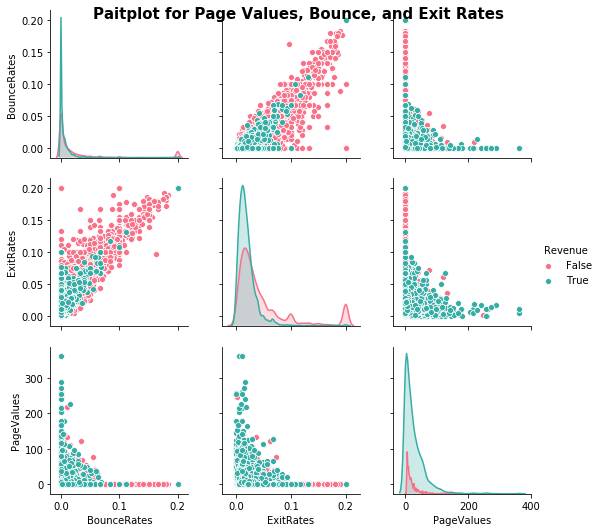

In [574]:
plt.figure(figsize=(18,10))
sns.pairplot(shoppers[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']], palette="husl", hue = 'Revenue')
plt.suptitle('Paitplot for Page Values, Bounce, and Exit Rates', fontweight="bold", fontsize = 15)
plt.show()

# Preparing Data for the Model
- The months names is replaced with numbers
- Visitor Type is changed to binary, where 0 represents Returning Visitors and 1 represent New Visitors and Others
- Revenue and Weekend columns False and True values are replaced with 0 and 1

In [608]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
shoppers.Month = shoppers.Month.map(d)

In [609]:
shoppers.VisitorType = shoppers.VisitorType.map(lambda x: 0 if x == 'Returning_Visitor' else 1)
shoppers.Revenue = shoppers.Revenue.map(lambda x: 0 if x == 'False' else 1)
shoppers.Weekend = shoppers.Weekend.map(lambda x: 0 if x == 'False' else 1)

# Clustering Models

## KMeans Model

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Make sure the number of rows divides evenly into four samples.
rows = shoppers.shape[0] - shoppers.shape[0] % 4
shoppers = shoppers.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = shoppers[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
             'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
             'Weekend', 'Revenue']]

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2 = train_test_split(
    X,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2 = train_test_split(
    X_half1,
    test_size=0.5,
    random_state=42)
X3, X4 = train_test_split(
    X_half2,
    test_size=0.5,
    random_state=42)

In [611]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([X1, X2, X3, X4]):
     
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data)
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [612]:
from sklearn import metrics
# Initialize data frames
ypred = pd.DataFrame()
score = pd.DataFrame(columns=['cluster_pred','sil_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1 ,X2 ,X3 ,X4]):
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 11):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data)
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [613]:
# Sorting sihoilette scores
score.sort_values(by='silhouette_score', ascending=False).head(10)

,cluster_pred,sil_score,silhouette_score
0,clust2_sample0,NaN,0.787073
27,clust2_sample3,NaN,0.784957
18,clust2_sample2,NaN,0.775427
28,clust3_sample3,NaN,0.768537
9,clust2_sample1,NaN,0.768133
1,clust3_sample0,NaN,0.737681
19,clust3_sample2,NaN,0.692726
10,clust3_sample1,NaN,0.684951
20,clust4_sample2,NaN,0.679454
29,clust4_sample3,NaN,0.679327


In [614]:
# checking the number of rows at each sample adn check if they are equal
print(len(X1))
print(len(X2))
print(len(X3))
print(len(X4))

3079
3079
3079
3079


## Mean Shift Model

In [615]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','mean_shift', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.1, 0.2, 0.3, 0.4]:
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        # Ensuring all sets are the same lenght
        data = data[:3079][:]
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True) 

In [616]:
score_ms.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,mean_shift,quantile,silhouette_score
3,clust11_sample0,NaN,0.4,0.762172
7,clust8_sample1,NaN,0.4,0.759043
2,clust12_sample0,NaN,0.3,0.749817
9,clust19_sample2,NaN,0.2,0.685881
10,clust12_sample2,NaN,0.3,0.684752
14,clust10_sample3,NaN,0.3,0.677465
11,clust11_sample2,NaN,0.4,0.631109
6,clust9_sample1,NaN,0.3,0.621297
15,clust10_sample3,NaN,0.4,0.620166
1,clust18_sample0,NaN,0.2,0.586548


## Spectral Clustring Model

In [617]:
from sklearn.cluster import SpectralClustering
# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1 ,X2 ,X3 ,X4]):
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data)
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data, labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



KeyboardInterrupt: 

In [374]:
score_sc.sort_values(by='silhouette_score', ascending=False).head(10)

,cluster_pred,silhouette_score


## Afinity Propagation Model

In [619]:
from sklearn.cluster import AffinityPropagation
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:3079][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)

In [620]:
score_af.sort_values(by='AF', ascending=False)

,cluster_pred,AF
1,clust763_sample1,0.242035
3,clust625_sample3,0.228061
0,clust961_sample0,0.160259
2,clust1138_sample2,0.144709


In [622]:
#Changing X from a data frame to a list
X = X.values

## Selected Model
- KMeans with 2 clusters has been selected because it resulted in the highest silhouette score.
- cluster_0 consists of 11,383 sessions (Large Cluster)
- cluster_1 consists of 933 sessions only (Small Cluster)

In [638]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

933

In [641]:
cluster_0 = X[y_pred == 0]
cluster_1 = X[y_pred == 1]
print('cluster_0 count =', len(cluster_0))
print('cluster_1 count =', len(cluster_1))

cluster_0 count = 11383
cluster_1 count = 933


## Sessions Time vs e-commerce Metrics
- There is no clear difference in terms of sessions adminstrative and Informational durations.
- It looks like cluster_1 has lower bounce and exit rates , and page values as well.
- There is a clear segmentation in terms of product related pages duration. 
    - Cluster_1 visitors spend longer time compare to Cluster_0 
    - Bounce, exit rates are lower as the producted related duration increaes
    

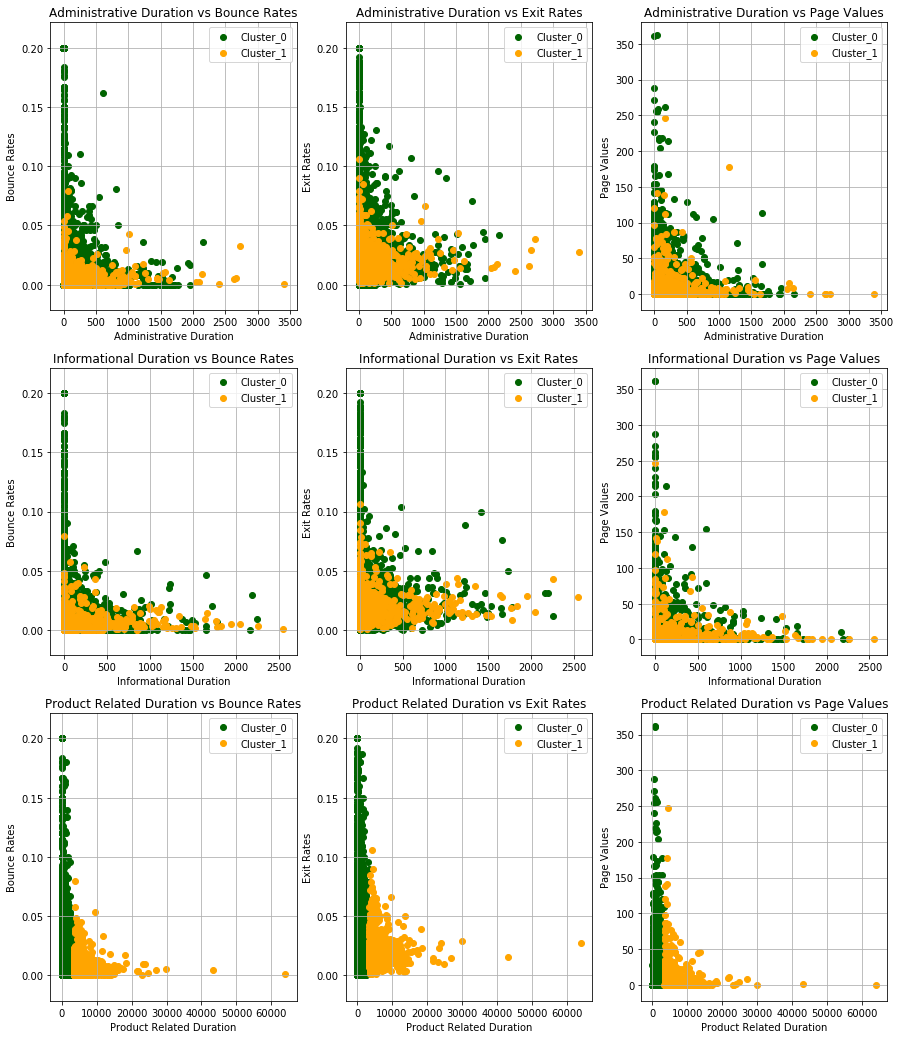

In [624]:
plt.figure(figsize=(15,18))

plt.subplot(3, 3, 1)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 3], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 3], color = 'orange', label = 'Cluster_1')
plt.title('Administrative Duration vs Bounce Rates')
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.grid()
plt.legend()

plt.subplot(3, 3, 2)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 4], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 4], color = 'orange', label = 'Cluster_1')
plt.title('Administrative Duration vs Exit Rates')
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.grid()
plt.legend()

plt.subplot(3, 3, 3)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 5], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 5], color = 'orange', label = 'Cluster_1')
plt.title('Administrative Duration vs Page Values')
plt.xlabel('Administrative Duration')
plt.ylabel('Page Values')
plt.grid()
plt.legend()

plt.subplot(3, 3, 4)
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 3], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 3], color = 'orange', label = 'Cluster_1')
plt.title('Informational Duration vs Bounce Rates')
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.grid()
plt.legend()

plt.subplot(3, 3, 5)
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 4], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 4], color = 'orange', label = 'Cluster_1')
plt.title('Informational Duration vs Exit Rates')
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.grid()
plt.legend()

plt.subplot(3, 3, 6)
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 5], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 5], color = 'orange', label = 'Cluster_1')
plt.title('Informational Duration vs Page Values')
plt.xlabel('Informational Duration')
plt.ylabel('Page Values')
plt.grid()
plt.legend()

plt.subplot(3, 3, 7)
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], color = 'orange', label = 'Cluster_1')
plt.title('Product Related Duration vs Bounce Rates')
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.grid()
plt.legend()

plt.subplot(3, 3, 8)
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 4], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 4], color = 'orange', label = 'Cluster_1')
plt.title('Product Related Duration vs Exit Rates')
plt.xlabel('Product Related Duration')
plt.ylabel('Exit Rates')
plt.grid()
plt.legend()

plt.subplot(3, 3, 9)
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 5], color = 'darkgreen', label = 'Cluster_0')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 5], color = 'orange', label = 'Cluster_1')
plt.title('Product Related Duration vs Page Values')
plt.xlabel('Product Related Duration')
plt.ylabel('Page Values')
plt.grid()
plt.legend()
plt.show()

In [642]:
X = pd.DataFrame(X)
X.columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
             'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
             'Weekend', 'Revenue']
y = pd.DataFrame(y_pred)
y.columns = ['cluster']
combined = X.join(y, how='inner')
combined.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0
2,-1.0,-1.0,-1.000000,0.20,0.20,0.0,0.0,2.0,0.0,1.0,9.0,3.0,0.0,0.0,0.0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2.0,3.0,0.0,1.0,4.0,0.0,1.0,0.0,0


## Revenue
- Approximatley 1 out of 3 sessions of cluster_1 visitorss resulted in a sales (revenue), while only 15% of the cluster_0 sessions resulted in sales. Cluster_1 visitors are more interested un buying.
- During Special Days, visitors from both clusters are less interested in buying with a conversion rate of only 6% for both clusters.
- Dursing Weekends the conversion rate is back to normal.

In [643]:
cluster_0 = combined.loc[combined['cluster'] == 0]
cluster_1 = combined.loc[combined['cluster'] == 1]
special_0 = cluster_0.loc[cluster_0['SpecialDay'] == 1]
special_1 = cluster_1.loc[cluster_1['SpecialDay'] == 1]
weekend_0 = cluster_0.loc[cluster_0['Weekend'] == 1]
weekend_1 = cluster_1.loc[cluster_1['Weekend'] == 1]

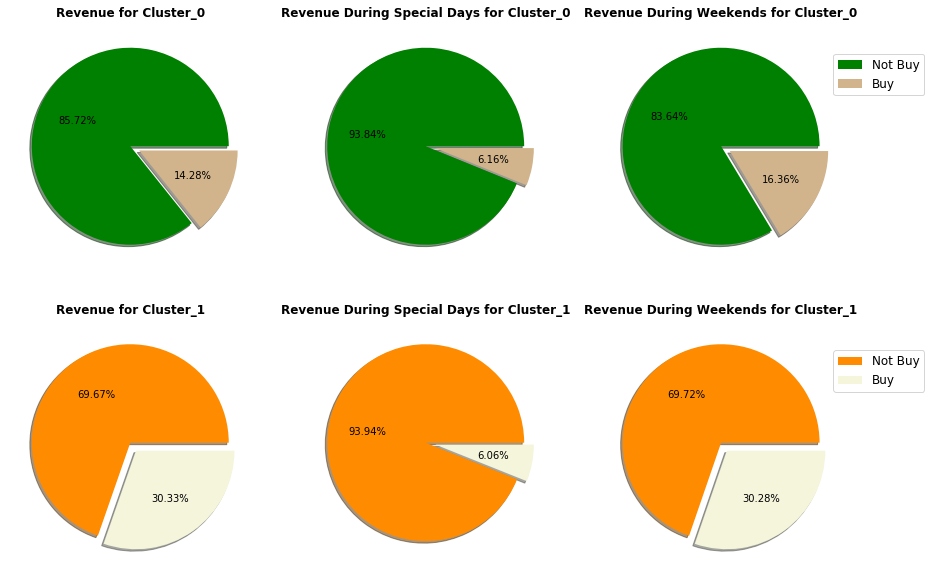

In [502]:
plt.figure(figsize=(15,10))

size = cluster_0['Revenue'].value_counts().tolist()
colors = ['green', 'tan']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue for Cluster_0', fontweight="bold")
plt.axis('off')


size = cluster_1['Revenue'].value_counts().tolist()
colors = ['darkorange', 'beige']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 4)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue for Cluster_1', fontweight="bold")
plt.axis('off')


size = special_0['Revenue'].value_counts().tolist()
colors = ['green', 'tan']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue During Special Days for Cluster_0', fontweight="bold")
plt.axis('off')


size = special_1['Revenue'].value_counts().tolist()
colors = ['darkorange', 'beige']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 5)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue During Special Days for Cluster_1', fontweight="bold")
plt.axis('off')


size = weekend_0['Revenue'].value_counts().tolist()
colors = ['green', 'tan']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 3)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue During Weekends for Cluster_0', fontweight="bold")
plt.axis('off')
plt.legend(bbox_to_anchor=(1.35,0.9), prop={'size': 12}, labels = labels, loc="upper right")

size = weekend_1['Revenue'].value_counts().tolist()
colors = ['darkorange', 'beige']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 6)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue During Weekends for Cluster_1', fontweight="bold")
plt.axis('off')
plt.legend(bbox_to_anchor=(1.35,0.9), prop={'size': 12}, labels = labels, loc="upper right")
plt.show()

## Weekends and Special Days
- No big difference betweem both clusters in terms of percentage of sessions occured on special days and weekends.

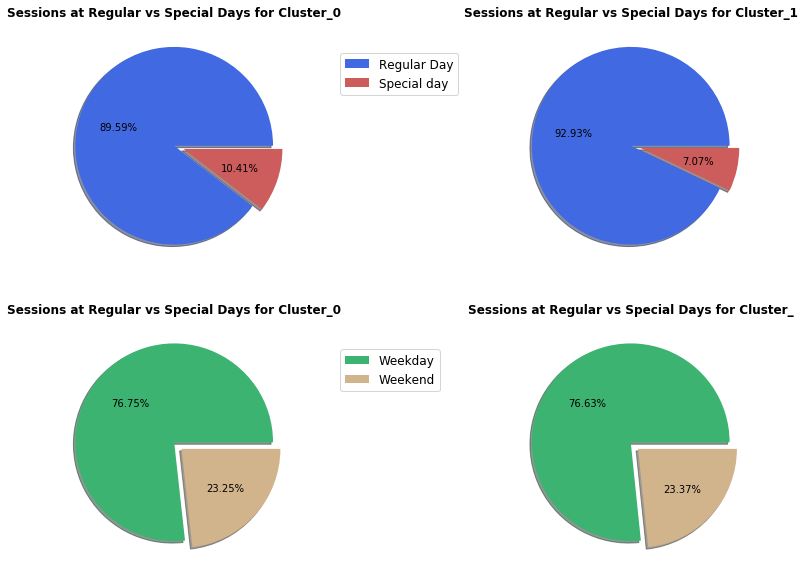

In [492]:
plt.figure(figsize=(15,10))

size = cluster_0['SpecialDay'].value_counts().tolist()
colors = ['royalblue', 'indianred']
labels = ['Regular Day', 'Special day']
explode = [0, 0.1]

plt.subplot(2, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions at Regular vs Special Days for Cluster_0', fontweight="bold")
plt.axis('off')


size = cluster_1['SpecialDay'].value_counts().tolist()
colors = ['royalblue', 'indianred']
labels = ['Regular Day', 'Special day']
explode = [0, 0.1]

plt.subplot(2, 2, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions at Regular vs Special Days for Cluster_1', fontweight="bold")
plt.axis('off')
plt.legend(bbox_to_anchor=(-0.7, 0.9), prop={'size': 12}, labels = labels, loc="upper left")

size = cluster_0['Weekend'].value_counts().tolist()
colors = ['mediumseagreen', 'tan']
labels = ['Weekday', 'Weekend']
explode = [0, 0.1]

plt.subplot(2, 2, 3)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions at Regular vs Special Days for Cluster_0', fontweight="bold")
plt.axis('off')


size = cluster_1['Weekend'].value_counts().tolist()
colors = ['mediumseagreen', 'tan']
labels = ['Weekday', 'Weekend']
explode = [0, 0.1]

plt.subplot(2, 2, 4)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions at Regular vs Special Days for Cluster_', fontweight="bold")
plt.axis('off')
plt.legend(bbox_to_anchor=(-0.7, 0.9), prop={'size': 12}, labels = labels, loc="upper left")
plt.show()

## Visitor Type
- Approximatley 98% of cluster_1 vistiros are returning vistiors. That percentage goes down to 85% for cluster_0 visitors.
- For both clusters, new visitors sessions had a high conversion rate to sales compare to returnign customers. 

In [507]:
returning_0 = cluster_0.loc[cluster_0['VisitorType'] == 0]
returning_1 = cluster_1.loc[cluster_1['VisitorType'] == 0]
new_0 = cluster_0.loc[cluster_0['VisitorType'] == 1]
new_1 = cluster_1.loc[cluster_1['VisitorType'] == 1]

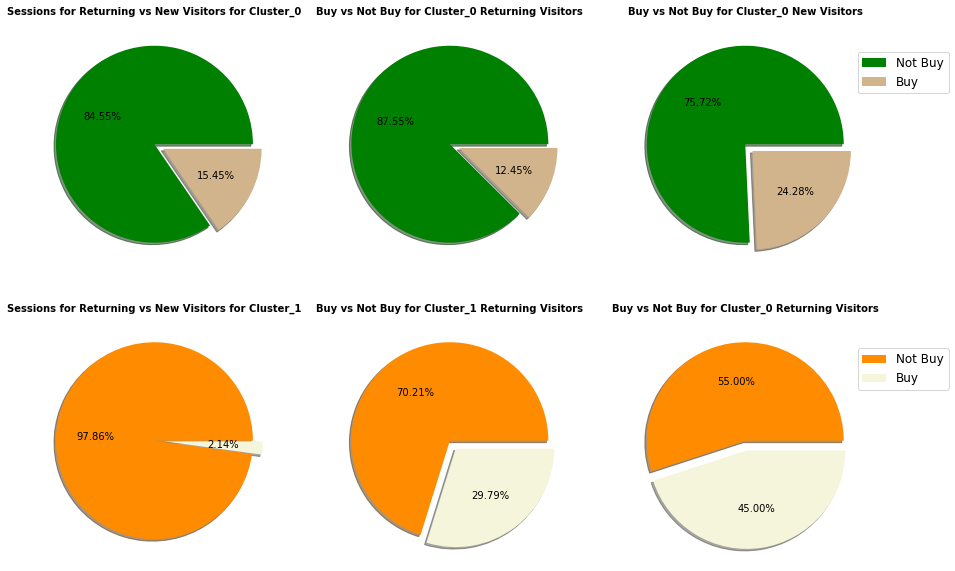

In [540]:
plt.figure(figsize=(15,10))

size = cluster_0['VisitorType'].value_counts().tolist()
colors = ['green', 'tan']
labels = ['Returning Visitor', 'New Visitor']
explode = [0, 0.1]

plt.subplot(2, 3, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions for Returning vs New Visitors for Cluster_0', fontweight="bold", fontsize = 10)
plt.axis('off')


size = cluster_1['VisitorType'].value_counts().tolist()
colors = ['darkorange', 'beige']
labels = ['Returning Visitor', 'New Visitor']
explode = [0, 0.1]

plt.subplot(2, 3, 4)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions for Returning vs New Visitors for Cluster_1', fontweight="bold", fontsize = 10)
plt.axis('off')


size = returning_0['Revenue'].value_counts().tolist()
colors = ['green', 'tan']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Buy vs Not Buy for Cluster_0 Returning Visitors', fontweight="bold", fontsize = 10)
plt.axis('off')


size = returning_1['Revenue'].value_counts().tolist()
colors = ['darkorange', 'beige']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 5)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Buy vs Not Buy for Cluster_1 Returning Visitors', fontweight="bold", fontsize = 10)
plt.axis('off')


size = new_0['Revenue'].value_counts().tolist()
colors = ['green', 'tan']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 3)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Buy vs Not Buy for Cluster_0 New Visitors', fontweight="bold", fontsize = 10)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.35,0.9), prop={'size': 12}, labels = labels, loc="upper right")

size = new_1['Revenue'].value_counts().tolist()
colors = ['darkorange', 'beige']
labels = ['Not Buy', 'Buy']
explode = [0, 0.1]

plt.subplot(2, 3, 6)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Buy vs Not Buy for Cluster_0 Returning Visitors', fontweight="bold", fontsize = 10)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.35,0.9), prop={'size': 12}, labels = labels, loc="upper right")
plt.show()

## Visitors Per Month
- Approximatley half of cluster_1 session occured in November, while only 22% of cluster_0 sessions occured in November
- 28% of cluster_0 session occured in May, while only 16% of culster_1 session occured in the same month
- It looks like cluster_1 visitors are visiting the website more during fall season, while cluster_0 visitors are visiting it during spring session more.

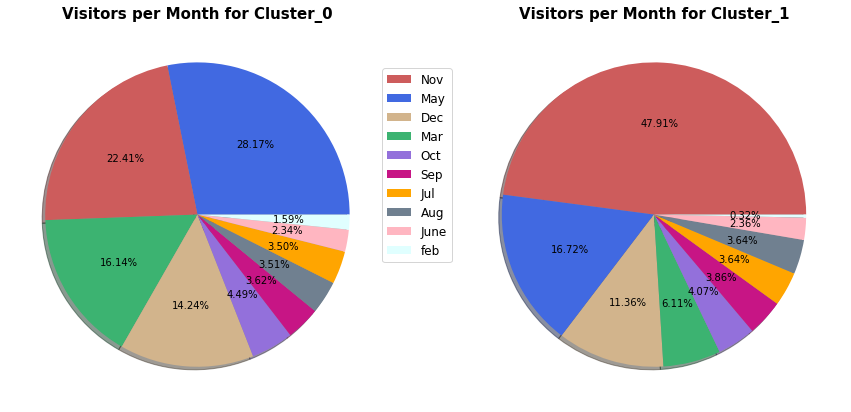

In [525]:
plt.figure(figsize=(15,10))
size = cluster_0['Month'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple', 'mediumvioletred', 'slategrey', 'orange', 
          'lightpink', 'lightcyan']
labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'feb']

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Visitors per Month for Cluster_0', fontweight="bold", fontsize = 15)
plt.axis('off')

size = cluster_1['Month'].value_counts().tolist()
colors = ['indianred', 'royalblue', 'tan','mediumseagreen', 'mediumpurple', 'mediumvioletred', 'orange', 'slategrey', 
          'lightpink', 'lightcyan']
labels = ['Nov', 'May', 'Dec', 'Mar', 'Oct', 'Sep', 'Jul', 'Aug', 'June', 'feb']

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Visitors per Month for Cluster_1', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(labels = labels, bbox_to_anchor=(-0.23, 0.9), prop={'size': 12}, loc="upper left")
plt.show()

## Region
- No big difference in terms of the distribution of the visitors among the 9 regions.
- cluster_1 visitors are more concentrated in region 1 (45%) compare to cluster_0 visitors (38%)

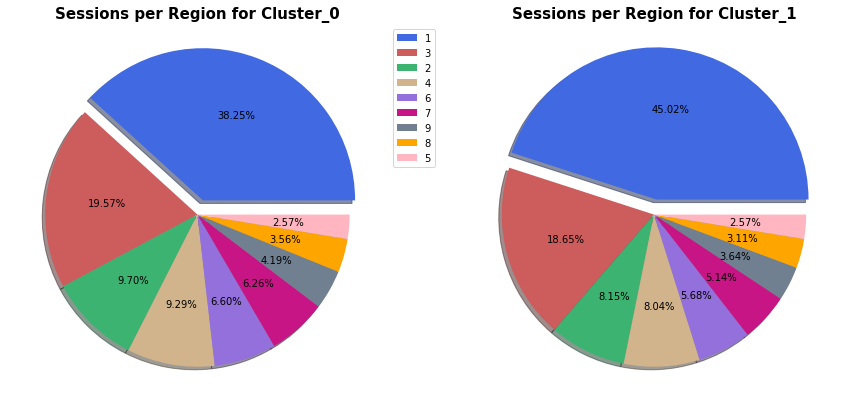

In [536]:
plt.figure(figsize=(15,10))
size = cluster_0['Region'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple', 'mediumvioletred', 'slategrey', 'orange', 
          'lightpink']
labels = ['1', '3', '4', '2', '6', '7', '9', '8', '5']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions per Region for Cluster_0', fontweight="bold", fontsize = 15)
plt.axis('off')

size = cluster_1['Region'].value_counts().tolist()
colors = ['royalblue', 'indianred', 'mediumseagreen', 'tan', 'mediumpurple', 'mediumvioletred', 'slategrey', 'orange', 
          'lightpink']
labels = ['1', '3', '2', '4', '6', '7', '9', '8', '5']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Sessions per Region for Cluster_1', fontweight="bold", fontsize = 15)
plt.axis('off')
plt.legend(bbox_to_anchor=(-0.2,1), labels = labels, loc="upper left")
plt.show()

# Conclusion
- This analysis succeded in segmenting the online shoppers into 2 clusters:


- **Cluster_1** (small cluster) represnting the more loyal customers who are most proberly are going to buy:
    - They spend more time during their sesions on product related pages
    - They have lower bounce and exit rates which shows rela interest
    - They are more proberly going to buy (1 out of 3 sessions resulted in sales)
    - 98% of them are returning customers (Loyal Customers)
    - More than 50% of their sessions occured during Fall season.  
    
    
- **Cluster_0** (Large cluster) representing regular customers who are less proberly are going to buy:
    - They spend less time during thier sessions on product related pages.
    - They have higher bounce and exit rates which means many of these session landed on the website by mistake.
    - They are less proberly going to buy (only 15% of the session resulted in sales)
    - The majority of the visitors are returning visitors but the new visitors percentage is higher here (15%)
    - Approximatley 45% of the sessions occured in Spring Season.

## Practical Use, End User Value of the Project, and Next steps

- This segmentation can be used to study each group indpendantly and plan targeted marketing strategy. for example 50% of cluster_1 sessions occured in Fall season. by more further analysis we might be able to increase their sessions through out the year or during spring season.


- This analysis shows a very low conversion rate during special days. These days should be opportunity to generate sales but most of the sessions resulted in no sales.


- This analysis can be expanded to generate more detailed results:
    - Clustering analys of cluster_0 visitors can be done to segreagte the customer more. This could add value in designing marketing strategy for cluster_0.
    - Add some information to the analysis like the value of the sales and categories of product sold can help on identfying more information about the clusters and reasons behind shoppers intentions.
    - Build a prediction model for the revenues and identify the most imp;ortant feautures.

## Weak Points and Shortcomings
- No information about the website in this analysis like (type of products sold, location, etc) which would helped in understanding thier business and provide more specific recommendations and understanding of the numbers.
- Many information were coded by numbers like visitors regions, operating systems, browser, etc. Knowing thier names could provide more insight to the analysis.
- Data from months January and April are not available in the dataset.
- the huge different in the size of the cluster does not provide the anticipated values of the project.
